In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Mall_Customers.csv")  #data=pd.read_csv("train.csv") for train.csv
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
# Select the relevant features
selected_features=['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]
np.random.seed(1)


/home/imaad/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(17.31944444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

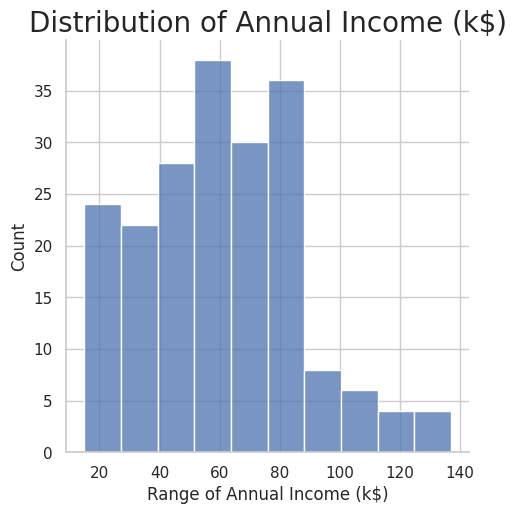

In [51]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

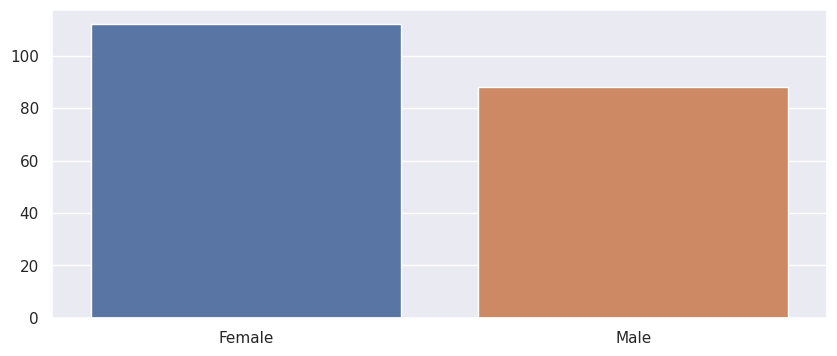

In [52]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

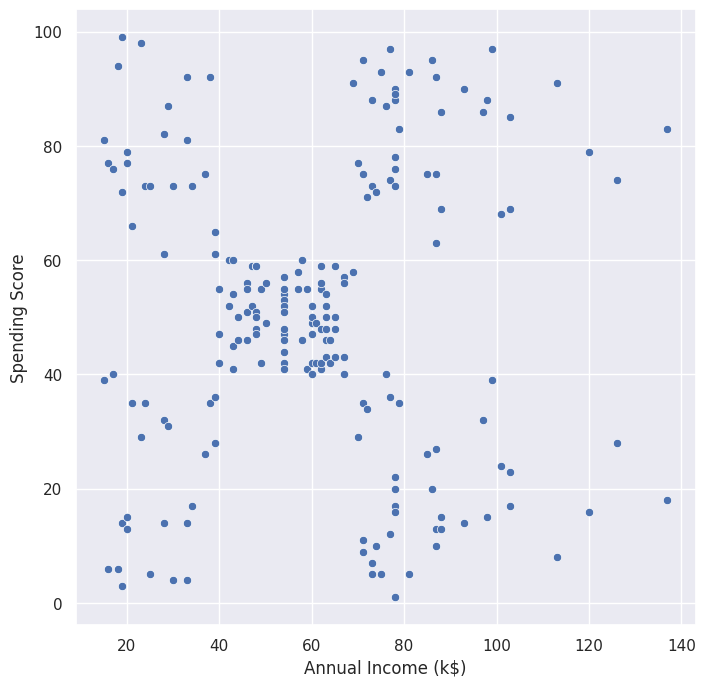

In [53]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [54]:

def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(X)

In [55]:
data.shape

(200, 5)

In [56]:
import math

def euclidean_distance(x1, x2):
    return math.sqrt(np.sum((x1 - x2) ** 2))


def initialize_centroids(data, k):
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))
    for j in range(n_features):
        min_val = np.min(data[:, j])
        max_val = np.max(data[:, j])
        centroids[:, j] = min_val + (max_val - min_val) * np.random.rand(k)
    return centroids

def kmeans_clustering(data, k, max_iters=100):
    n_samples, n_features = data.shape

    centroids = initialize_centroids(data, k)
    clusters = np.zeros(n_samples, dtype=int)

    for _ in range(max_iters):
        for i in range(n_samples):
            distances = [euclidean_distance(data[i], centroids[j]) for j in range(k)]
            clusters[i] = np.argmin(distances)

        new_centroids = np.zeros((k, n_features))
        for j in range(k):
            new_centroids[j] = np.mean(data[clusters == j], axis=0)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids.copy()
    return centroids, clusters


In [57]:
# Take input for the number of clusters (k) from the user
k = int(input("Enter the number of clusters (k): "))

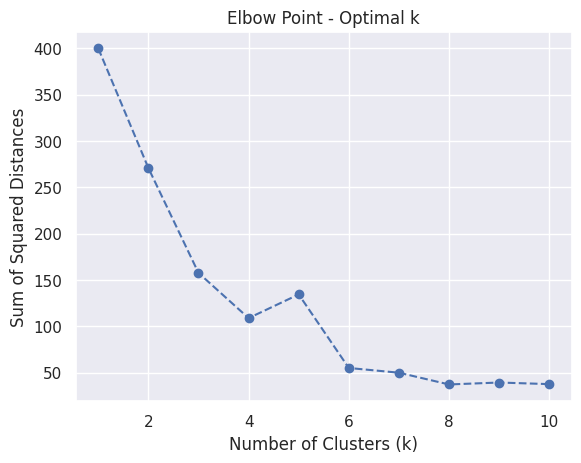

In [58]:


ssd = []

for k_val in range(1, 11):
    centroids, clusters = kmeans_clustering(X_scaled.values, k_val)
    sse = np.sum((X_scaled .values- centroids[clusters]) ** 2)#it calculates the squared distances between each data point and its assigned centroid, sums them up, and stores the result in the variable sse.
    ssd.append(sse)

plt.plot(range(1, 11), ssd, 'o--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Point - Optimal k")
plt.show()


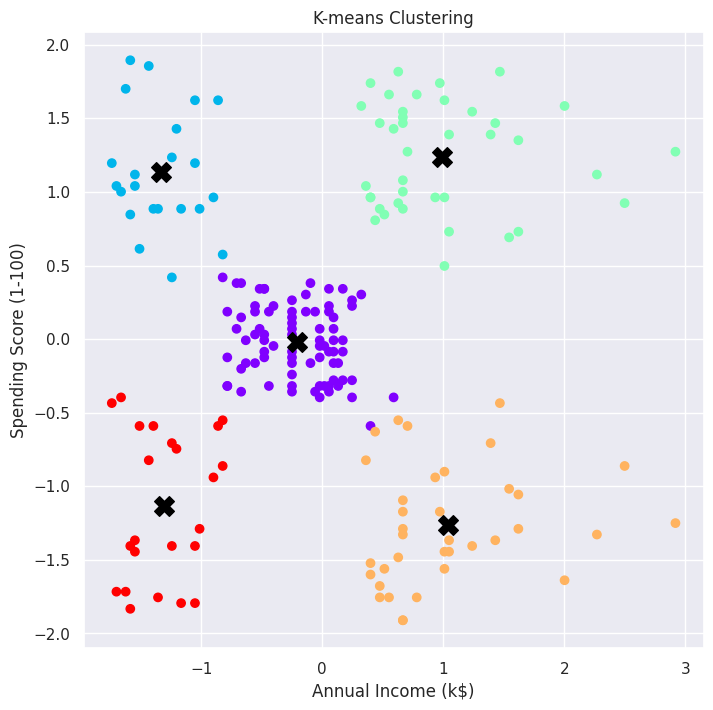

In [59]:
# Apply k-means clustering
centroids, clusters = kmeans_clustering(X_scaled.values, k)
np.random.seed(1)
# Visualize the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()


In [60]:
#It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.